In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reload and display seaborn-based plots
df = pd.read_csv('../data/insurance.csv')




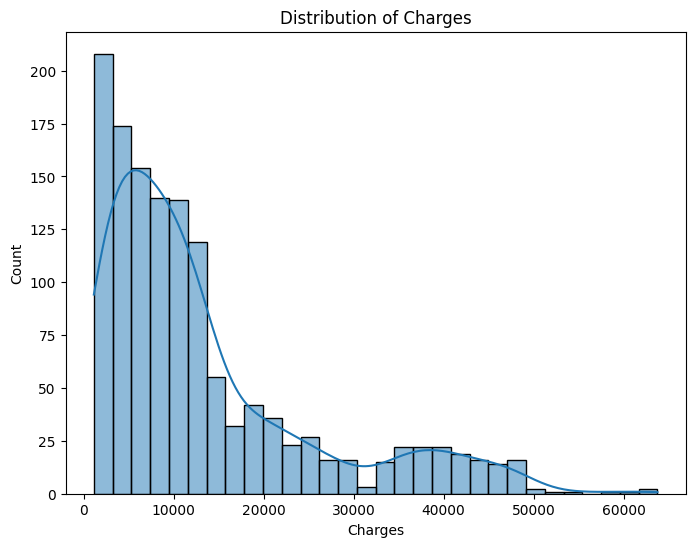

In [ ]:

# 1. Distribution of charges with seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='charges', bins=30, kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()



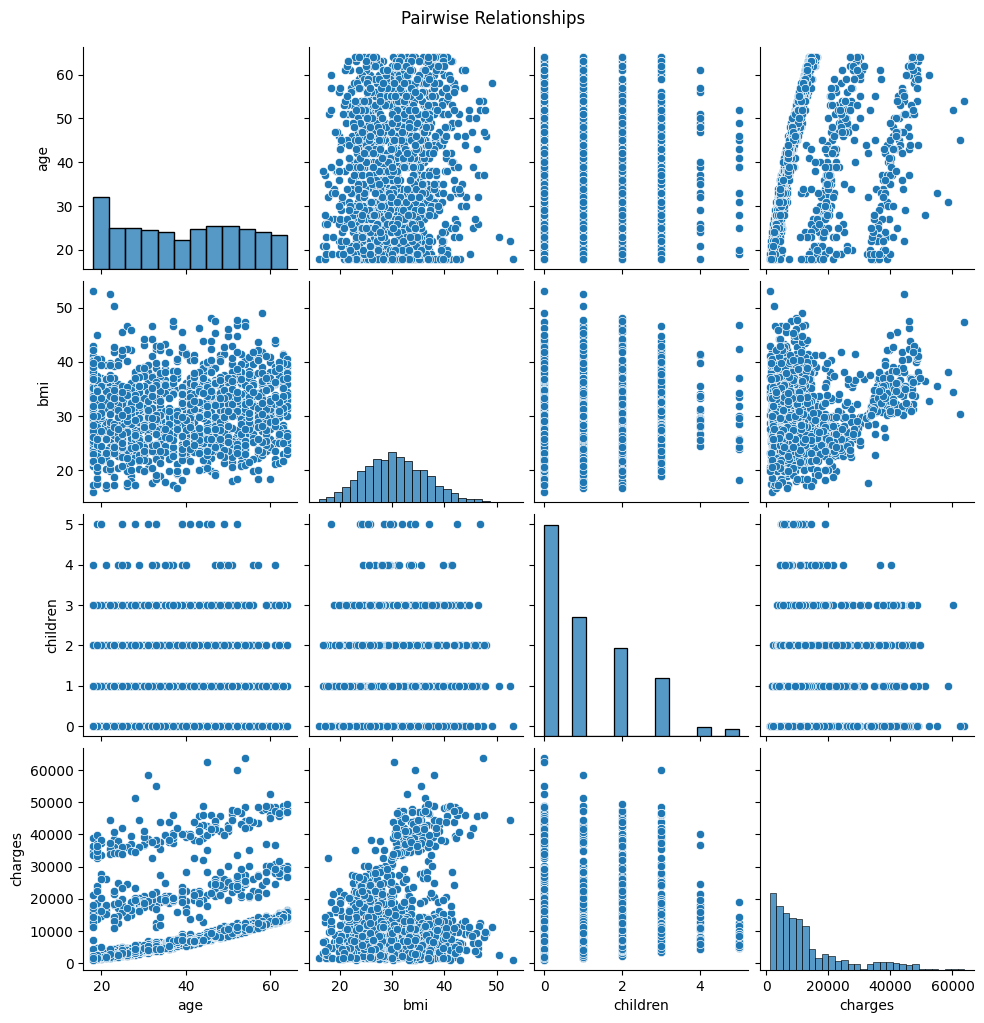

In [3]:
# 2. Pairwise relationships with seaborn
sns.pairplot(df[['age', 'bmi', 'children', 'charges']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()



In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../data/insurance.csv')



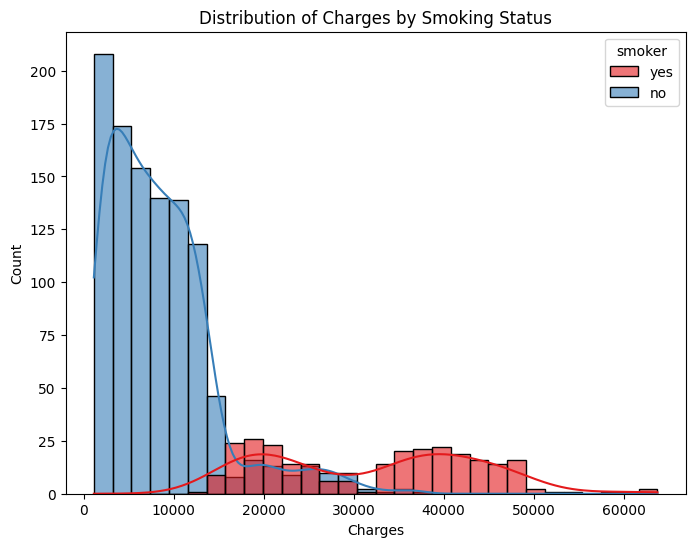

In [7]:
# Convert numeric columns
numeric_cols = ['age', 'bmi', 'children', 'charges']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df_clean = df.dropna(subset=numeric_cols + ['smoker'])

# Create smoker numeric flag for correlation
df_clean['smoker_flag'] = df_clean['smoker'].map({'yes': 1, 'no': 0})

# 1. Distribution of charges by smoking status
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x='charges', hue='smoker', bins=30, kde=True, palette='Set1', alpha=0.6)
plt.title('Distribution of Charges by Smoking Status')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()


/Users/ammarbinzulqarnain/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/ammarbinzulqarnain/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/ammarbinzulqarnain/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/ammarbinzulqarnain/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/ammarbinzulqarnain/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable h

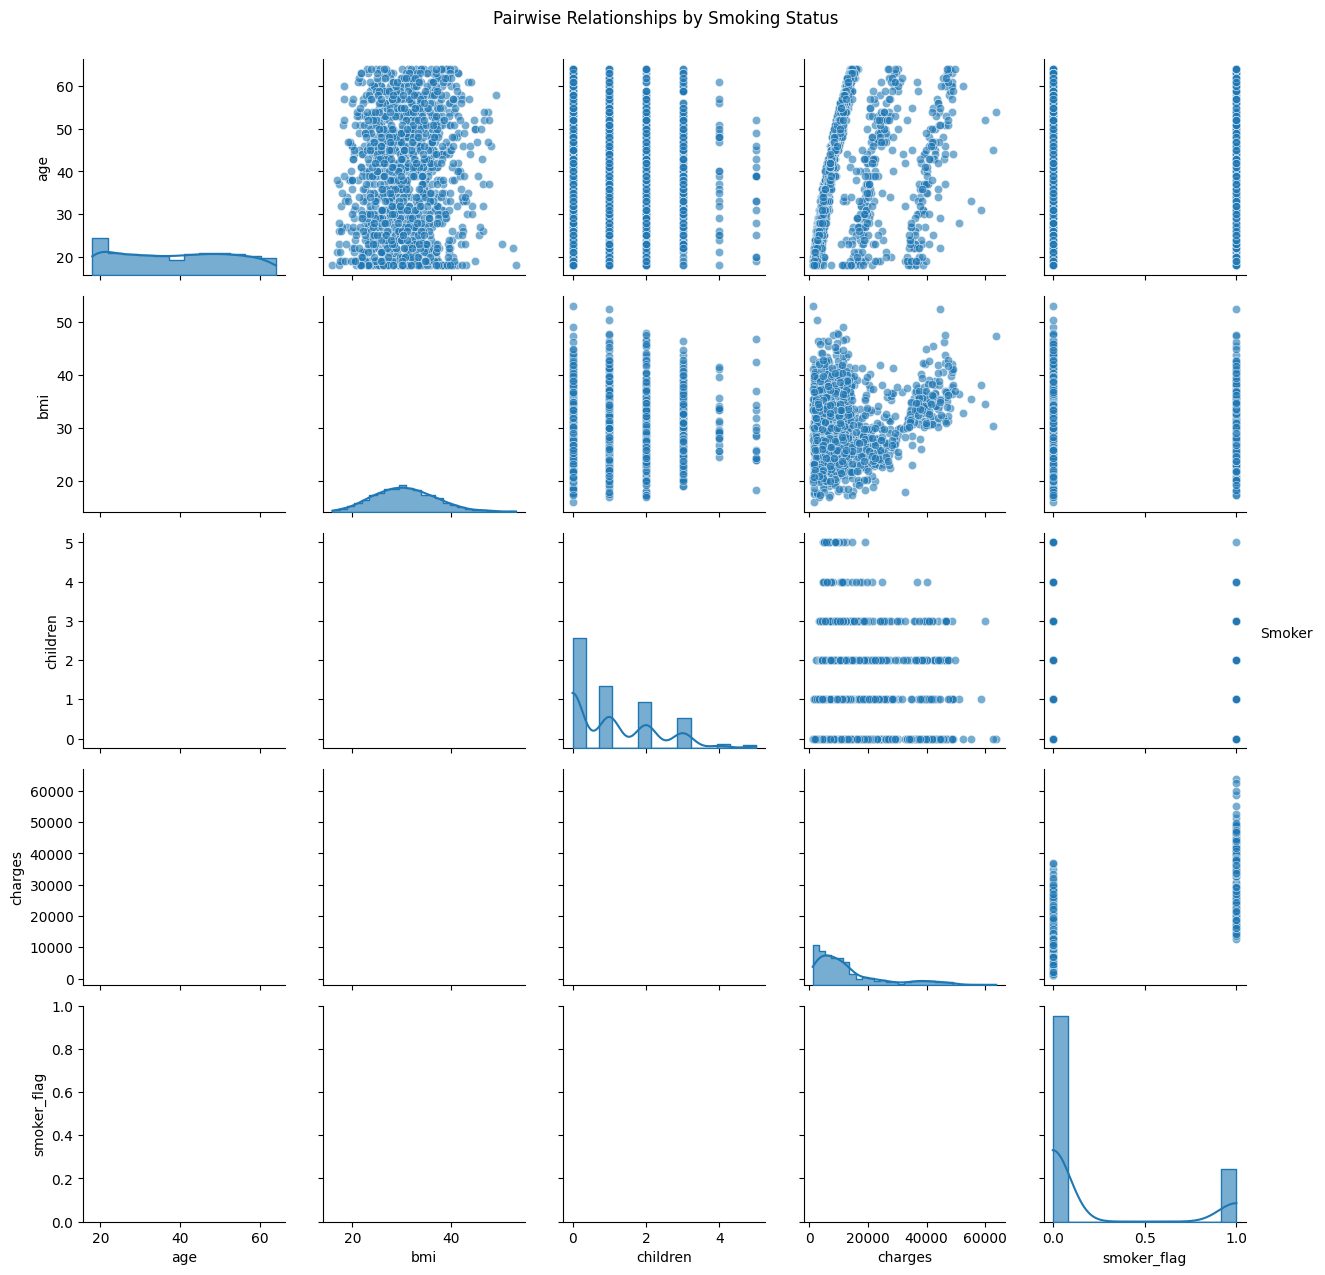

In [12]:
df_clean

,age,sex,bmi,children,smoker,region,charges,smoker_flag
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


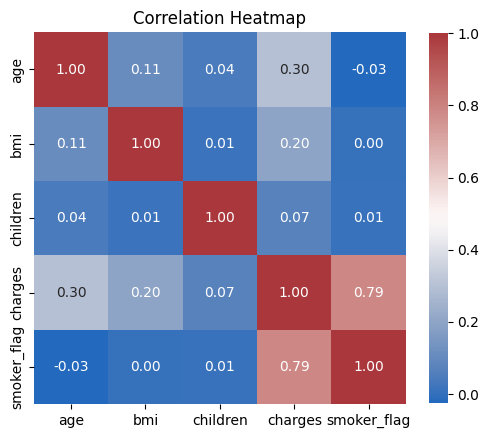

In [10]:
# 3. Correlation heatmap including smoker_flag
corr = df_clean[numeric_cols + ['smoker_flag']].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, fmt='.2f', square=True, cmap='vlag', cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap')
plt.show()
